-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
Finished training the model
1/1 [==============================] - 0s 112ms/step
[[211.27545]]
These are the layer variables: [array([[1.8292081]], dtype=float32), array([28.354637], dtype=float32)]


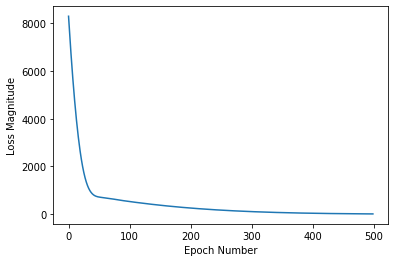

In [ ]:
# Esempio 1, costruzione di un modelo che, dati dei input in Celsius, trovi il corrispettivo valore in Fahreinheit senza formula.
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
# dati esempio
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

#Layer singolo che usa un neurone (units=1)  che prende un input da single value (input_shape=1)
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

#Assemblo il model dal layer
model = tf.keras.Sequential([l0])

# N.B. Posso definire il layer direttamente assemblando il modello
#model = tf.keras.Sequential([
#  tf.keras.layers.Dense(units=1, input_shape=[1])
#])


# compilo il modello
model.compile(loss='mean_squared_error', #errore quadrico medio (media dei valori per l'errore)
              optimizer=tf.keras.optimizers.Adam(0.1)) # optimizers, funzione per calcolare la precisione delle varibili interne durante l'allenamento
              # più il valore è piccolo più iterazioni il modello avra bisogno di fare per predire un Label, di solito tra 0.001 (default), e 0.1.

#allenamento
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")



#statistica:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
# chiedo al modello di predire il output di 100 secondo il suo allenamento
print(model.predict([100.0]))

# stampo i weights per vedere le varibili che ha settato
print("These are the layer variables: {}".format(l0.get_weights()))

otteniamo 211 dal modello, secondo la formula da celsius a Fahrenheit, 100 sarebbe 212 quindi assumiamo che il modello ha predetto corretamente il valore.